<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


**<h1> Manipulating Images :PIL </h1>**


<h2>Objectives</h2>


In this lab, you will learn how to manipulate images, both as arrays(using numpy array) and PIL image objects. You will learn how to copy an image to avoid aliasing. We will cover flipping images and cropping images. You will also learn to change pixel images; this will allow you to draw shapes, write text and superimpose images over other images.


<ul>
    <li><a href='#MI'>Manipulating Images </a>
        <ul>
            <li>Copying Images  </li>
            <li>Fliping Images </li>
            <li>Cropping an Image </li>
            <li>Changing Specific Image Pixels </li>
     
  
    
</ul>


----


Download the images for the lab:


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png -O cat.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Copying Images


If you want to reassign an array to another variable, you should use the `copy` method. 


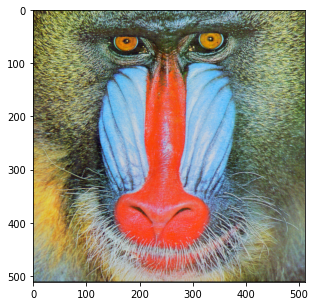

In [17]:
baboon = np.array(Image.open('baboon.png'))  # we can convert  an PIL object to an array not the .png or .jpg
#baboon = np.array('baboon.png')  this will not work .
plt.figure(figsize=(5,5))
plt.imshow(baboon )
plt.show()

If we do not apply the method `copy()`, the two variables would point to the same location in memory:


We use the  `id`  function to find a variable's memory address; we see the objects in the memory space which the variables `A` and `baboon` point to are the same.


In [5]:
A = baboon
id(A) == id(baboon)

True

However, if we apply method `copy()`, their memory addresses are different.


In [18]:
B = baboon.copy()
id(B)==id(baboon)

False

There may be unexpected behaviours when two variables point to the same object in memory. Consider the array `baboon`. If we set all its entries to zero, all entires in `A` will become zero as well. However, as `baboon` and `B` points to different objects, the values in `B` will not be affected. 


In [19]:
baboon[:,:,] = 0

We can compare the variables <code>baboon</code> and array <code>A</code>:


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

## Flipping Images 


Flipping images involves reordering the indices of the pixels such that it changes the orientation of the image. Consider the following image:


In [ ]:
image = Image.open("cat.png")        #loading the image.
array = np.array(image)
width, height, C = array.shape
print('width, height, C', width, height, C)
print(array)

We can cast it to an array and find its shape:


Let's flip, i.e rotate vertically, the image. Let's try the traditional approach. First, we create an array of the same size with datatype <code>np.uint8</code>.


In [22]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

We assign the first row of pixels of the original array to the new array’s last row. We repeat the process for every row, incrementing the row number from the original array and decreasing the new array’s row index to assign the pixels accordingly. After excecuting the for loop below, `array_flip` will become the flipped image. 


In [ ]:
for i,row in enumerate(array):
    #print(i)
    #print(row)     # whole rows
    array_flip[width - 1 - i, :, :] = row  

plt.figure(figsize=(10,10))
plt.imshow(array_flip)   #we  can show this flipped array .
plt.title("Flipped cat")
plt.show()

<code>PIL</code> has several ways to flip an image, for example, we can use the <code>ImageOps</code> module:


In [26]:
from PIL import ImageOps

The `flip()` method of `ImageOps` module flips the image. The `mirror()` method will mirror  the image:


In [ ]:
im_flip = ImageOps.flip(image)  #image is the PIL object.
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

In [ ]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

We can use  the <code>transpose()</code> method; the parameter is an integer indicating what type of transposition we would like to perform. For example, we can flip the image using a value of `1`.


In [ ]:
im_flip = image.transpose(1)    #values to perform .
plt.imshow(im_flip)
plt.show()

The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following <code>dict</code>:


In [27]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

We see the values are integers.


In [28]:
flip["FLIP_LEFT_RIGHT"]
flip["ROTATE_270"]

4

We can plot each of the outputs using the different  parameter values:


In [ ]:
for key, values in flip.items():  #flip is a dictionary.
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

 ## Cropping an Image


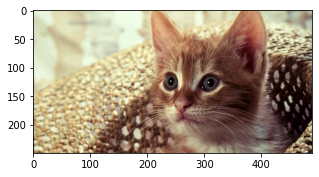

In [36]:
upper = 150
lower = 400
crop_top = array[upper:lower,:,:]  #array is the numpy array of the image.
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

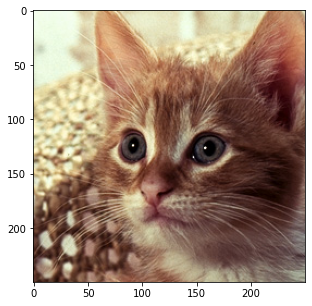

In [37]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

You can crop the PIL image using the <code>crop()</code> method, using the parameters from above Set the cropping area with <code>box=(left, upper, right, lower)</code>.


In [ ]:
image = Image.open("cat.png")
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

We can also flip the new image:


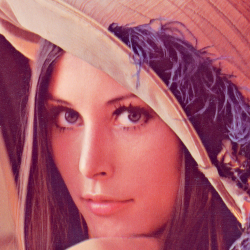

In [31]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

## Changing Specific Image Pixels


We can change specific image pixels using  array indexing; for example, we can set  all the green and blue channels in the original image we cropped to zero:


In [ ]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

We can compare the results with the new image. 


We can also use the `ImageDraw` module from `PIL` library, which provides simple 2D graphics for Image objects 


In [39]:
from PIL import ImageDraw 

We will copy the image object:


In [40]:
image_draw = image.copy()    # image is the PIL object.
image_fn = ImageDraw.Draw(im=image_draw)
#The draw constructor creates an object that can be used to draw in the given image. The input im is the image we would like to draw in.


We can draw a rectangle using the <code>rectangle</code> function, two important parameters include: <code>xy</code> – the coordinates bounding box  and <code>fill</code> – Color of the rectangle.


In [41]:
#Whatever method we apply to the object image_fn will change the image object image_draw.

shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="red")


We can plot the image.


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

There are other shapes we can use. For example, we can also overlay text on an image: we use the ImageFont module to obtain  bitmap fonts.


In [42]:
from PIL import ImageFont

We use the text method to place the text on the image. The parameters include `xy` (the top-left anchor coordinates of the text), the parameter `text` (the text to be drawn), and `fill` (the color to use for the text).


In [43]:
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

We can overlay or paste one image over another by reassigning the pixel for one array to the next. Consider the following image array:


In [46]:
image_lenna = Image.open("lenna.png")
array_lenna = np.array(image_lenna)

We can reassign the pixel values as follows:


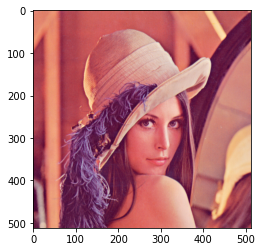

In [47]:
array_lenna[upper:lower,left:right,:]=array[upper:lower,left:right,:]
plt.imshow(array_lenna)
plt.show()

In the same manner, the <code>paste()</code> method allows you to overlay one image over another, with the input being the image you would like to overlay. The parameter box is the left and upper coordinate of the image:


In [50]:
image_lenna.paste(crop_image, box=(left,upper))
plt.imshow(image_lenna)
plt.show()

We can see the method `copy()` applies to some <code>PIL</code> objects. We create two image objects, we set `new_image` to the `image`, and we use the method `copy()` for the `copy_image` object.


In [52]:
image = Image.open("cat.png")
new_image=image
copy_image=image.copy()

If we use the method <code>copy()</code>, the address is different:


If we change the object <code>image</code>, <code>new_image</code> will change, but <code>copy_image</code> will remain the same:


In [55]:
image_fn= ImageDraw.Draw(im=image)
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))
image_fn.rectangle(xy=shape,fill="red")

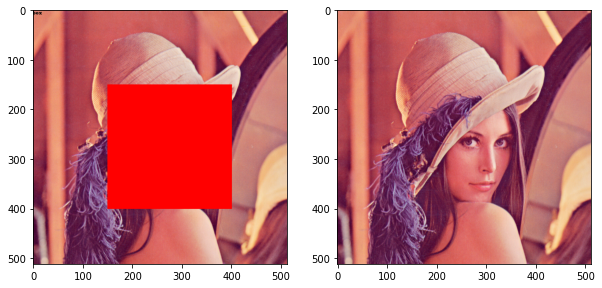

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()

### Question 1:
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a PIL Image object called `im`, flip `im` and create an image called `im_flip`. Mirror `im` and create an image called `im_mirror`. Finally, plot both images.


In [ ]:
# write your script here
im = Image.open("baboon.png")  #open the image and create an PIL object.mro

im_flip = ImageOps.flip(im)
im_mirror = ImageOps.mirror(im)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im_flip)
plt.subplot(122)
plt.imshow(im_mirror)
plt.show()
